In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.segmentation import clear_border
from skimage import measure
from skimage.measure import label,regionprops
from scipy import ndimage as ndi
from scipy.ndimage import measurements, center_of_mass,binary_dilation,zoom
import plotly.graph_objects as go
import cv2 


In [2]:
#!git clone https://github.com/devrimcavusoglu/pybboxes.git
#%cd pybboxes
#!python setup.py install

In [3]:
import pybboxes as pbx

(1100, 2730)


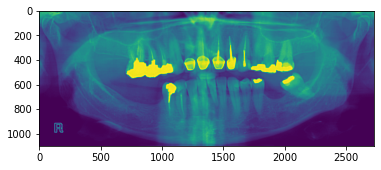

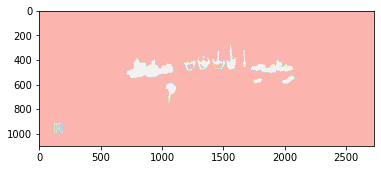

In [4]:
index = 11
image = io.imread(f'./images/{index}.png')
print(image.shape)
masked = np.where(image > 220,1,0)
plt.imshow(image)
plt.show()
plt.imshow(masked,cmap='Pastel1')
plt.show()

In [5]:
areas = np.vectorize(label,signature='(n,m)->(n,m)')(masked)
np.unique(areas)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56], dtype=int64)

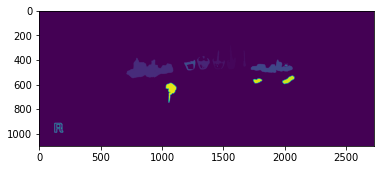

In [6]:
plt.imshow(areas)

In [7]:
for i in np. unique(areas):    
    if np.where(areas == i,1,0).sum()<1150 :
        np.place(areas,  np.where(areas == i,1,0), 0)
       
        
np.unique(areas)

array([ 0,  1,  2,  3,  6,  7, 12, 14, 52, 53, 54], dtype=int64)

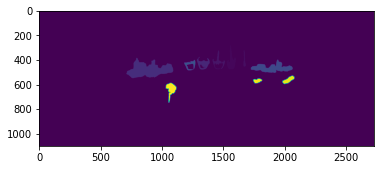

In [8]:
plt.imshow(areas)

In [9]:
'''
2) X-coordinate  
3) Y-coordinate  
4) height of the bounding box  
5) Width of the bounding box
'''

'\n2) X-coordinate  \n3) Y-coordinate  \n4) height of the bounding box  \n5) Width of the bounding box\n'

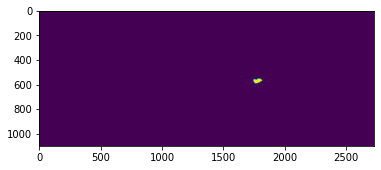

In [22]:
t46 = np.where(areas == 53,1,0)
h = np.max(t46.sum(axis = 0))
w = np.max(t46.sum(axis = 1))
y_min = next((i for i, x in enumerate(t46.sum(axis = 1)) if x), None)
x_min = next((i for i, x in enumerate(t46.sum(axis = 0)) if x), None)
plt.imshow(np.where(areas == 53,1,0))

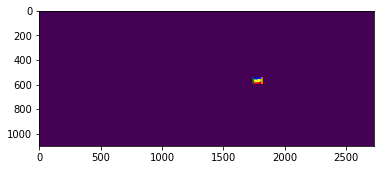

In [24]:
plt.imshow(np.where(areas == 53,1,0))
plt.plot([x_min,x_min+w],[y_min+h,y_min+h],c='red')
plt.plot([x_min,x_min+w],[y_min,y_min],c='blue')

plt.plot([x_min,x_min],[y_min,y_min+h],c='green')
plt.plot([x_min+w,x_min+w],[y_min,y_min+h],c='orange')

In [25]:
image = io.imread(f'./images/{index}.png')

masked = np.where(image > 220,1,0)

areas = np.vectorize(label,signature='(n,m)->(n,m)')(masked)

for i in np. unique(areas):    
    if np.where(areas == i,1,0).sum()<1150 :
        np.place(areas,  np.where(areas == i,1,0), 0)


j=index
f= open(f"./label/{j}.txt","w+")
for i in  np.unique(areas):      
    if i!=0:        
        image_f_c = np.where(areas == i,1,0)
        h = np.max(image_f_c.sum(axis = 0))
        w = np.max(image_f_c.sum(axis = 1))
        y_min = next((i for i, x in enumerate(image_f_c.sum(axis = 1)) if x), None)
        x_min = next((i for i, x in enumerate(image_f_c.sum(axis = 0)) if x), None)
        
        c = (int(x_min), int(y_min), int(x_min+w), int(y_min+h)) #pixel koordinatlari
        yolo_normalized = pbx.convert_bbox(c, from_type="voc", to_type="yolo", image_size=areas.shape)
        pbx.convert_bbox(c, from_type="voc", to_type="yolo", image_size=areas.shape)
        f.write(f'1 {yolo_normalized[0]} {yolo_normalized[1]} {yolo_normalized[2]} {yolo_normalized[3]}\n')
f.close()
        